/home/alexp/projects/vehicle-dynamics-project/src/vdyn/telemetry/aim.py:79: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


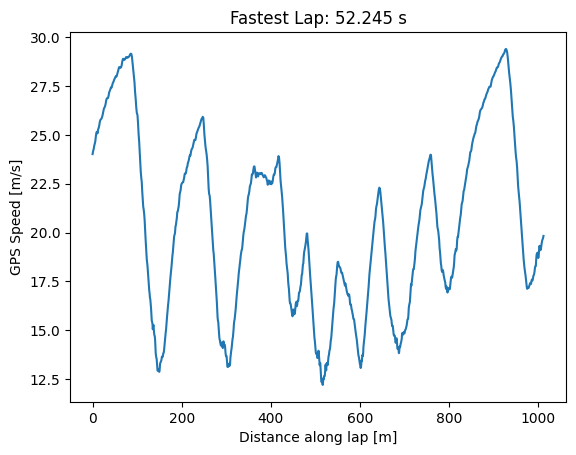

In [3]:
from vdyn.telemetry.laps import get_fastest_lap_from_csv
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "../data/2.csv"

lap, info = get_fastest_lap_from_csv(CSV_PATH)

# Speed vs distance
plt.figure()
plt.plot(lap["s_rel"], lap["speed_mps"])
plt.xlabel("Distance along lap [m]")
plt.ylabel("GPS Speed [m/s]")
plt.title(f"Fastest Lap: {info['lap_time']:.3f} s")
plt.show()

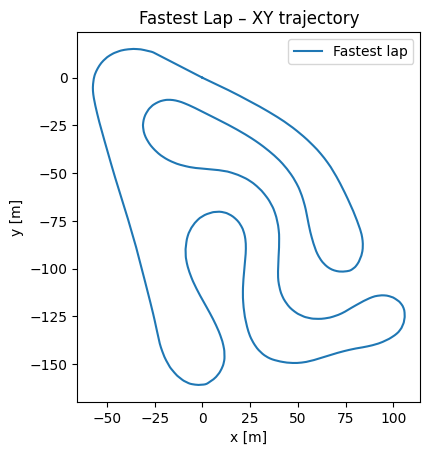

In [5]:
# XY trajectory
R = 6371000.0
lat = np.radians(pd.to_numeric(lap["GPS Latitude"], errors="coerce").to_numpy())
lon = np.radians(pd.to_numeric(lap["GPS Longitude"], errors="coerce").to_numpy())

# This check prevents errors if the lap data is empty
if len(lat) < 2:
    print("Not enough data points to plot the lap.")
else:
    lat0, lon0 = lat[0], lon[0]
    x = R * (lon - lon0) * np.cos(lat0)
    y = R * (lat - lat0)

    x_closed = np.append(x, x[0])
    y_closed = np.append(y, y[0])

    plt.figure()
    plt.plot(x_closed, y_closed, label="Fastest lap")
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("x [m]"); plt.ylabel("y [m]")
    plt.title("Fastest Lap – XY trajectory")
    plt.legend(); plt.show()